# Utilizando Lógica Fuzzy para identificar perfis no NPS
Neste notebook vamos implementar um Fuzzy Control System para saber se um determinado cliente pode ser um promotor, neutro ou detrator.

## O que é o NPS?
O Net Promoter Score, ou NPS, é uma metodologia criada por Fred Reichheld nos EUA, com o objetivo de realizar a mensuração do Grau de Lealdade dos Consumidores de qualquer tipo de empresa.

In [159]:
# !pip install -U scikit-fuzzy

In [160]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

import matplotlib.pyplot as plt
%matplotlib inline

### Estabelecendo os objetos Antecedent/Consequent
Escolhemos como pergunta de pesquisa: 
- "Como foi sua experiência com a nossa empresa? (de 0 a 10)"
- "Quanto você recomendaria nosso produto para um amigo? (de 0 a 10)"

In [161]:
# nossas entradas, as respostas das perguntas do cliente. 
satisfacao   = ctrl.Antecedent(np.arange(0, 11, 1), 'satisfacao')
recomendacao = ctrl.Antecedent(np.arange(0, 11, 1), 'recomendacao') 

In [162]:
# Auto-membership function population is possible with .automf(3, 5, or 7)
satisfacao.automf(3)
recomendacao.automf(3)

In [163]:
# nossa saída: aquele que devemos identificar o perfil
cliente = ctrl.Consequent(np.arange(0, 11, 1), 'cliente')

In [164]:
cliente['muito detrator'] = fuzz.trimf(cliente.universe, [0, 0, 3])
cliente['pouco detrator'] = fuzz.trimf(cliente.universe, [0, 3, 6])
cliente['neutro']         = fuzz.trimf(cliente.universe, [5, 7, 8])
cliente['pouco promotor'] = fuzz.trimf(cliente.universe, [7, 9,10])
cliente['muito promotor'] = fuzz.trimf(cliente.universe, [8, 10, 10])

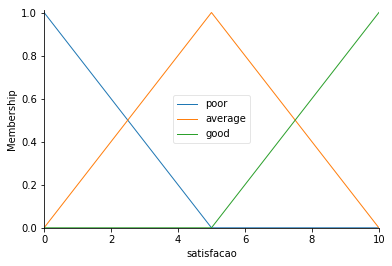

In [165]:
# Visualizando
satisfacao.view() #pensar em mudar nome de categorias dps

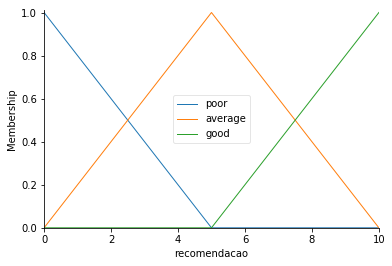

In [166]:
recomendacao.view()

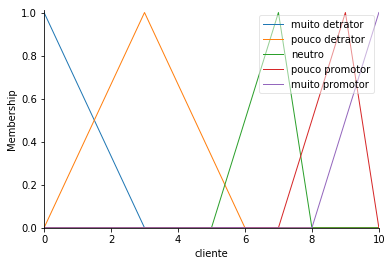

In [167]:
cliente.view() # categorização de clientes sao muito separatistas

In [168]:
# Definindo as regras
#Para ser tido como promotor
rule1 = ctrl.Rule(recomendacao['good'] & satisfacao['good'], cliente['muito promotor'])
rule2 = ctrl.Rule(recomendacao['average'] & satisfacao['good'] |
                  recomendacao['good'] & satisfacao['average'], cliente['pouco promotor'])

#Para ser tido como neutro
rule3 = ctrl.Rule(recomendacao['average'] & satisfacao['average'], cliente['neutro'])
rule6 = ctrl.Rule(recomendacao['poor'] & satisfacao['good'], cliente['neutro'])
rule7 = ctrl.Rule(recomendacao['good'] & satisfacao['poor'], cliente['neutro'])

#Para ser tido como detrator
rule4 = ctrl.Rule(recomendacao['poor'] & satisfacao['average'] |
                  recomendacao['average'] & satisfacao['poor'], cliente['pouco detrator'])

rule5 = ctrl.Rule(recomendacao['poor'] & satisfacao['poor'], cliente['muito detrator'])



In [169]:
# Criando sistema de controle
cliente_tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5])
cliente_tipping = ctrl.ControlSystemSimulation(cliente_tipping_ctrl)

In [170]:
def tipo_cliente(cliente):
    if cliente <= 3:
        return "MUITO detrator!"
    elif (cliente > 3)  & (cliente <= 6):
        return "POUCO detrator!"
    elif (cliente > 6) & (cliente <= 8):
        return "neutro!"
    elif (cliente > 8) & (cliente <= 9):
        return "POUCO promotor!"
    elif cliente > 9:
        return "MUITO promotor!"

## Supondo: satisfação = 8 e recomendacao = 10 

8.8125
POUCO promotor!


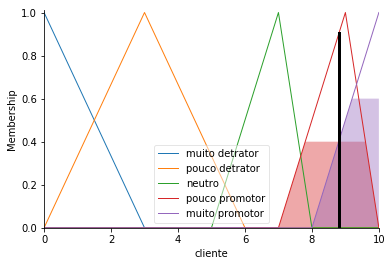

In [171]:
cliente_tipping.input['satisfacao'] = 8.0
cliente_tipping.input['recomendacao'] = 10.0

cliente_tipping.compute()
print(cliente_tipping.output['cliente'])
print(tipo_cliente(cliente_tipping.output['cliente']))
cliente.view(sim=cliente_tipping)

## Supondo: satisfação = 3 e recomendacao = 2

3.729496402877698
POUCO detrator!


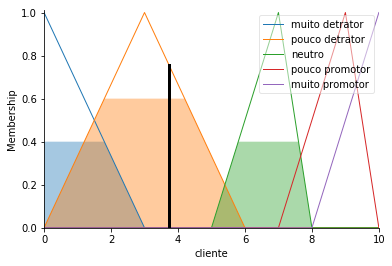

In [172]:
cliente_tipping.input['satisfacao'] = 3.0
cliente_tipping.input['recomendacao'] = 2.0
cliente_tipping.compute()

print(cliente_tipping.output['cliente'])
print(tipo_cliente(cliente_tipping.output['cliente']))
cliente.view(sim=cliente_tipping)

## Supondo: satisfação = 6 e recomendacao = 8

7.820657276995306
neutro!


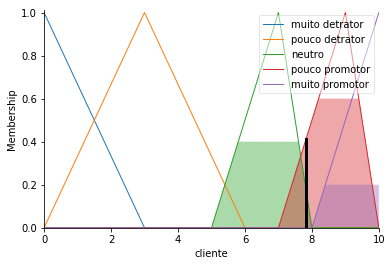

In [173]:
cliente_tipping.input['satisfacao'] = 6.0
cliente_tipping.input['recomendacao'] = 8.0
cliente_tipping.compute()

print(cliente_tipping.output['cliente'])
print(tipo_cliente(cliente_tipping.output['cliente']))
cliente.view(sim=cliente_tipping)

## Supondo: satisfação = 1 e recomendacao = 9

5.098611111111111
POUCO detrator!


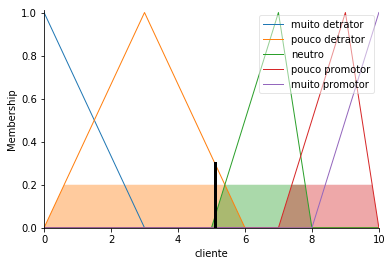

In [174]:
cliente_tipping.input['satisfacao'] = 1.0
cliente_tipping.input['recomendacao'] = 9.0
cliente_tipping.compute()

print(cliente_tipping.output['cliente'])
print(tipo_cliente(cliente_tipping.output['cliente']))
cliente.view(sim=cliente_tipping)